In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [8]:
models = {
    "svm_linear":SVC(kernel="linear",C=1),
    "svm_rbf":SVC(kernel="rbf",gamma="scale"),
    "svm_poly":SVC(kernel="poly",C=1,degree=3),
    "svm_sigmoid":SVC(kernel="sigmoid",C=1)
}

In [17]:
Accuracy_score= []
Precision_score = []
Recall_score = []
F1_Score = []

for name , model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred = model.predict(x_test_scaled)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  Accuracy_score.append(accuracy)
  Precision_score.append(precision)
  Recall_score.append(recall)
  F1_Score.append(f1)


In [20]:
model_names = list(models.keys())
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": Accuracy_score,
    "Precision": Precision_score,
    "Recall": Recall_score,
    "F1-Score": F1_Score
})
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,svm_linear,0.956140,0.971429,0.957746,0.964539
1,svm_rbf,0.982456,0.972603,1.000000,0.986111
2,svm_poly,0.868421,0.825581,1.000000,0.904459
3,svm_sigmoid,0.956140,0.945946,0.985915,0.965517


In [22]:
df_long = results_df.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Score"
)


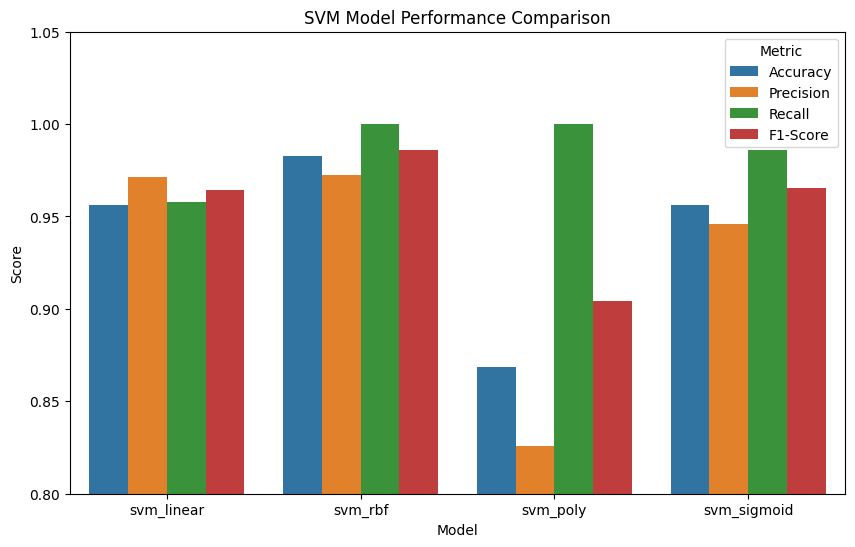

In [25]:

plt.figure(figsize=(10,6))

sns.barplot(
    data=df_long,
    x="Model",
    y="Score",
    hue="Metric"
)

plt.title("SVM Model Performance Comparison")
plt.ylim(0.8, 1.05)
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()


In [30]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,svm_linear,0.956140,0.971429,0.957746,0.964539
1,svm_rbf,0.982456,0.972603,1.000000,0.986111
2,svm_poly,0.868421,0.825581,1.000000,0.904459
3,svm_sigmoid,0.956140,0.945946,0.985915,0.965517


# Task 5
RBF kernel gives us the best accuracy score, precision score , recall score and f1 score